# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.146917e+01     6.436804e+00
 * time: 0.0030031204223632812
     1     2.797931e+01     4.209411e+00
 * time: 0.01388692855834961
     2     1.862578e+01     3.622730e+00
 * time: 0.026829004287719727
     3     1.235317e+01     2.404703e+00
 * time: 0.03968000411987305
     4     1.154979e+01     3.050186e+00
 * time: 0.050026893615722656
     5     1.118694e+01     2.626966e+00
 * time: 0.06039309501647949
     6     1.013986e+01     2.051563e+00
 * time: 0.07117104530334473
     7     9.082604e+00     1.281653e+00
 * time: 0.08194303512573242
     8     8.445934e+00     6.274912e-01
 * time: 0.09261894226074219
     9     8.215573e+00     5.016522e-01
 * time: 0.10346007347106934
    10     8.209214e+00     8.541275e-01
 * time: 0.11168789863586426
    11     8.180378e+00     7.798427e-01
 * time: 0.11973905563354492
    12     8.149277e+00     6.112667e-01
 * time: 0.1280059814453125
    13     8.073661e+00     3.990434e-01
 * ti

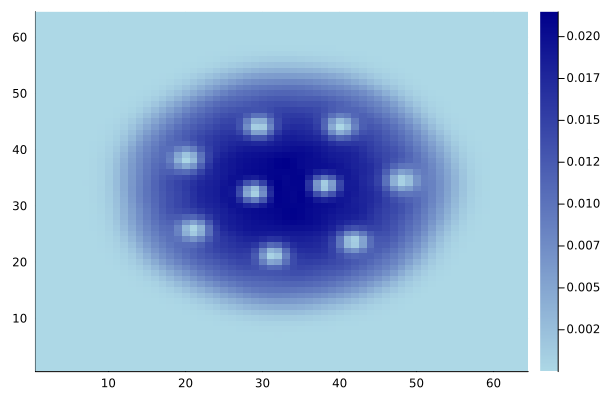

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)